Загрузка данных

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Пример декодированного отзыва:

In [2]:
word_index = imdb.get_word_index()
num=6
reverse_word_index=dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[num]])
print(decoded_review)
print(train_data[num])

? lavish production values and solid performances in this straightforward adaption of jane ? satirical classic about the marriage game within and between the classes in ? 18th century england northam and paltrow are a ? mixture as friends who must pass through ? and lies to discover that they love each other good humor is a ? virtue which goes a long way towards explaining the ? of the aged source material which has been toned down a bit in its harsh ? i liked the look of the film and how shots were set up and i thought it didn't rely too much on ? of head shots like most other films of the 80s and 90s do very good results
[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 2, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94,

Векторизация (прямое кодирование) исходных данных:

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate (sequences):
        results[i, sequence] = 1
    print([type(i),type(sequence)])
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
test_labels

[<class 'int'>, <class 'list'>]
[<class 'int'>, <class 'list'>]


array([0, 1, 1, ..., 0, 0, 0])

In [4]:
len(train_data)

25000

Выделяем 10000 образцов для проверки в процессе настрйоки сети

In [5]:
x_val = x_train[:10000]
partial_x_train= x_train[10000:]

y_val = y_train[:10000]
partial_y_train= y_train[10000:]

Конфигурация модели, компиляция модели


In [6]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape = (10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val,y_val))



Epoch 1/10
30/30 [==============================] - 1s 22ms/step - loss: 0.4648 - acc: 0.7994 - val_loss: 0.3388 - val_acc: 0.8774
Epoch 2/10
30/30 [==============================] - 0s 12ms/step - loss: 0.2659 - acc: 0.9087 - val_loss: 0.2856 - val_acc: 0.8870
Epoch 3/10
30/30 [==============================] - 0s 12ms/step - loss: 0.1905 - acc: 0.9352 - val_loss: 0.2737 - val_acc: 0.8895
Epoch 4/10
30/30 [==============================] - 0s 12ms/step - loss: 0.1529 - acc: 0.9472 - val_loss: 0.2841 - val_acc: 0.8844
Epoch 5/10
30/30 [==============================] - 0s 12ms/step - loss: 0.1170 - acc: 0.9607 - val_loss: 0.4053 - val_acc: 0.8501
Epoch 6/10
30/30 [==============================] - 0s 12ms/step - loss: 0.0972 - acc: 0.9687 - val_loss: 0.3593 - val_acc: 0.8768
Epoch 7/10
30/30 [==============================] - 0s 12ms/step - loss: 0.0786 - acc: 0.9746 - val_loss: 0.3609 - val_acc: 0.8781
Epoch 8/10
30/30 [==============================] - 0s 12ms/step - loss: 0.0653 - a

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Построим графики потерь и точности на обучающих и проверочных данных в зависимости от эпохи

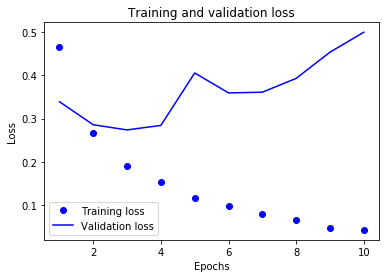

In [8]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range (1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

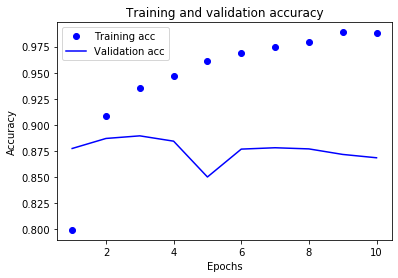

In [9]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
b=np.array([[1, 4,5,5] , [2,5,0,9,1]])

c = np.zeros((len(b), 10))

for i, a in enumerate(b):
        print([type(i),type(a)])
        c[i, a] = 1
       

[<class 'int'>, <class 'list'>]
[<class 'int'>, <class 'list'>]


<ipython-input-10-a4f5f9fc35a8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b=np.array([[1, 4,5,5] , [2,5,0,9,1]])


In [11]:
print(b)
print(c)


[list([1, 4, 5, 5]) list([2, 5, 0, 9, 1])]
[[0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 0. 0. 0. 1.]]
